From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



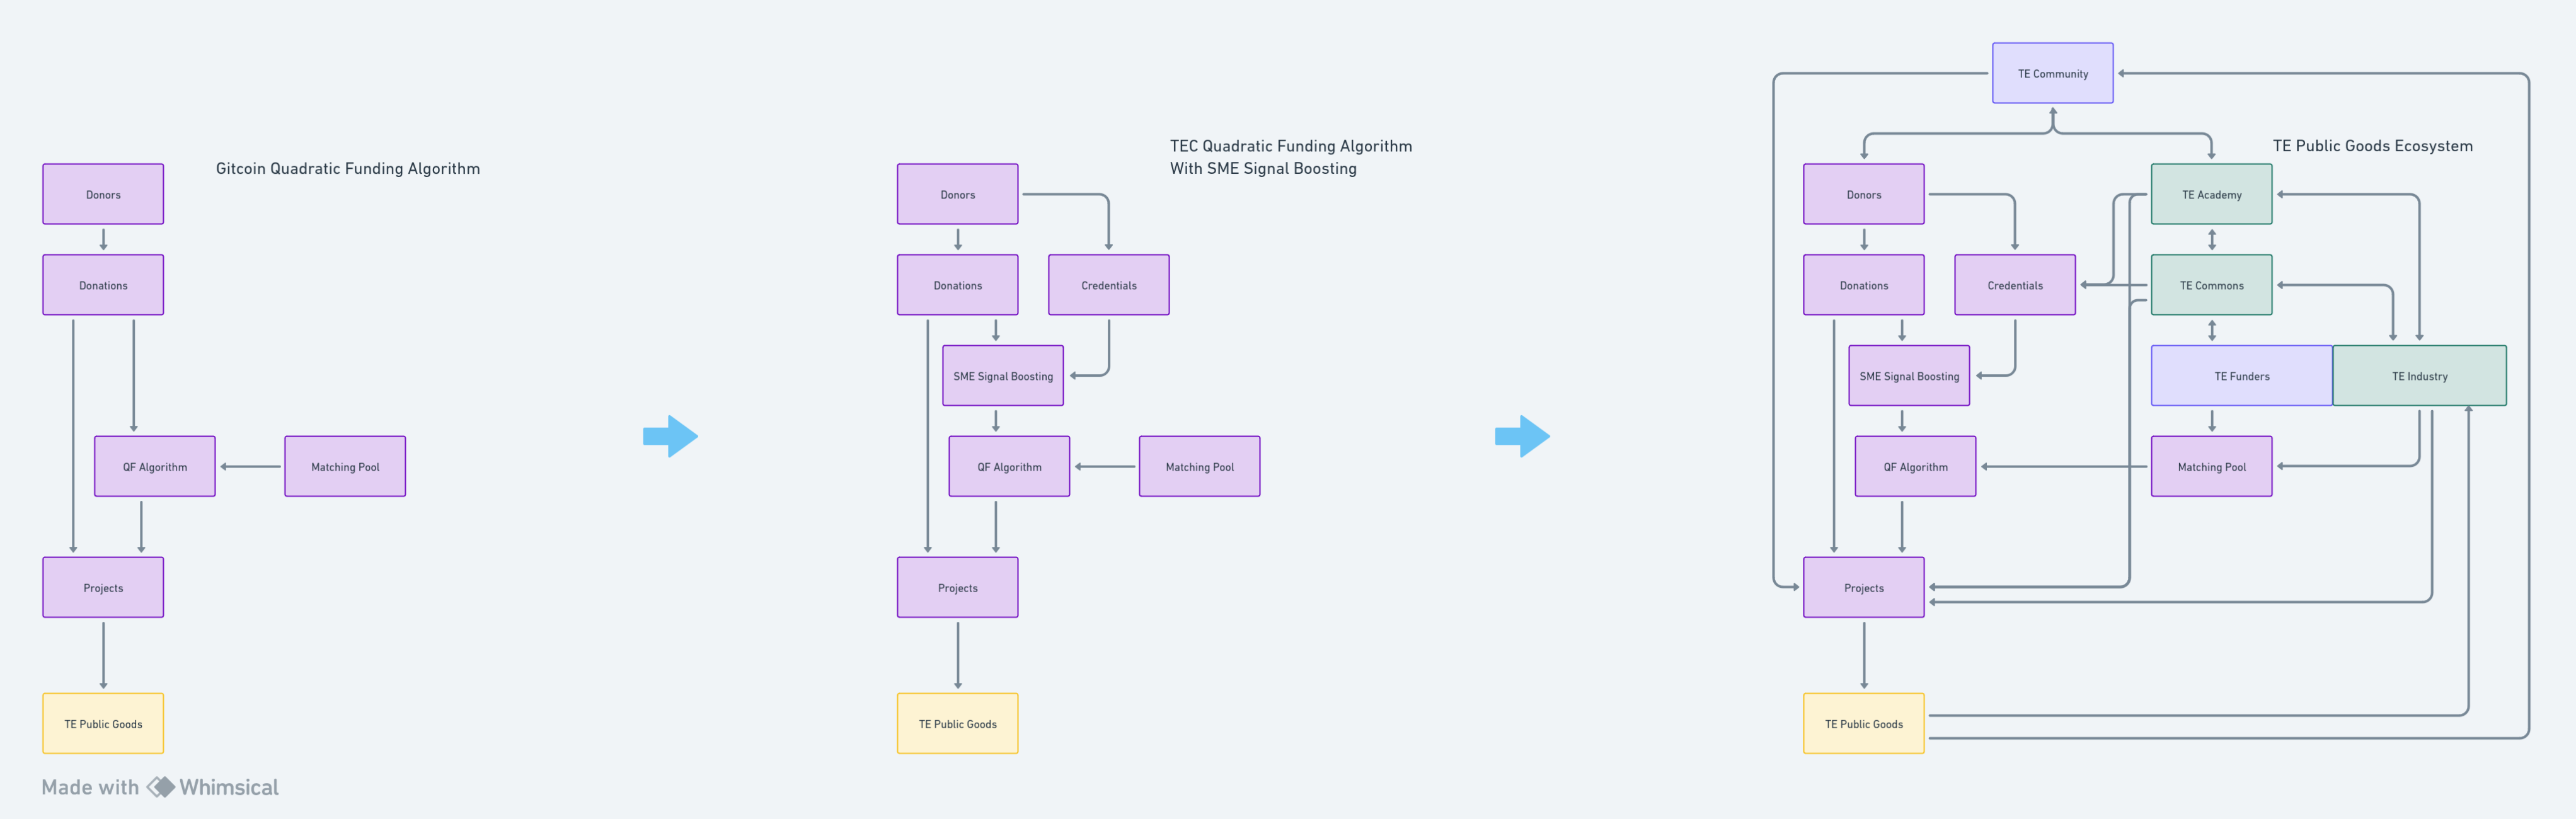![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([13, 26,  5, 24, 10, 28, 14, 17,  6, 15, 25, 11, 12, 19, 18,  8, 29,
       23,  0, 27, 16,  3,  2,  7,  1, 22])

In [3]:
public_goods

[(0, 18),
 (1, 22),
 (2, 27),
 (3, 16),
 (4, 25),
 (5, 28),
 (6, 28),
 (7, 16),
 (8, 7),
 (9, 16),
 (10, 25),
 (11, 1),
 (12, 19),
 (13, 11),
 (14, 6),
 (15, 16),
 (16, 16),
 (17, 25),
 (18, 10),
 (19, 23),
 (20, 10),
 (21, 28),
 (22, 1),
 (23, 2)]

In [4]:
len(society)

30

In [5]:
len(community)

26

In [6]:
len(public_goods)

24

## 3.1 Individual Preferences and Actions

The paper calls for Concave, Smooth, Increasing preferences towards the funding of public goods.

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0.19185710375058496,
 'f1': 0.5091918142352521,
 'steepness': 14.72337826008296}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=719, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 720)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"


Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i,"((0, 18), 0)","((0, 18), 1)","((0, 18), 2)","((0, 18), 3)","((0, 18), 4)","((0, 18), 5)","((0, 18), 6)","((0, 18), 7)","((0, 18), 8)","((0, 18), 9)",...,"((23, 2), 20)","((23, 2), 21)","((23, 2), 22)","((23, 2), 23)","((23, 2), 24)","((23, 2), 25)","((23, 2), 26)","((23, 2), 27)","((23, 2), 28)","((23, 2), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.149644,0.40844,0.003162,0.366565,0.000000,0.000000,0.000000,0.209417,0.204369,0.515024,...,0.000000,0.000000,0.000000,0.056622,0.000000,0.035546,0.000000,0.169195,0.139685,0.342038
0.002506,0.150569,0.40844,0.027782,0.369060,0.031014,0.025220,0.005526,0.238212,0.210560,0.515024,...,0.015858,0.022091,0.046611,0.062868,0.029447,0.059445,0.033941,0.191474,0.140401,0.342038
0.005013,0.151487,0.40844,0.051461,0.371533,0.060794,0.049804,0.010948,0.265903,0.216615,0.515024,...,0.031389,0.043395,0.091050,0.068977,0.057716,0.082624,0.066729,0.212723,0.141114,0.342038
0.007519,0.152398,0.40844,0.074235,0.373985,0.089388,0.073768,0.016266,0.292532,0.222537,0.515024,...,0.046598,0.063939,0.133417,0.074951,0.084854,0.105103,0.098405,0.232990,0.141823,0.342038
0.010025,0.153301,0.40844,0.096139,0.376417,0.116843,0.097127,0.021482,0.318139,0.228330,0.515024,...,0.061493,0.083751,0.173809,0.080793,0.110905,0.126904,0.129006,0.252321,0.142529,0.342038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.262056,0.40844,0.647492,0.651211,0.779041,0.999996,0.290239,0.960291,0.486238,0.515024,...,0.766556,0.619726,1.000000,0.339631,0.735910,0.827914,1.000000,0.651177,0.264750,0.342038
0.992481,0.262097,0.40844,0.647492,0.651298,0.779041,0.999997,0.290241,0.960291,0.486239,0.515024,...,0.766560,0.619726,1.000000,0.339632,0.735910,0.827915,1.000000,0.651177,0.264852,0.342038
0.994987,0.262137,0.40844,0.647492,0.651384,0.779041,0.999998,0.290244,0.960291,0.486240,0.515024,...,0.766564,0.619726,1.000000,0.339633,0.735910,0.827915,1.000000,0.651177,0.264954,0.342038


Display Citizen Preferences for Funding.

In [17]:
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Melting preferences to get groupby on public good or on citizen.

In [20]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 18), 0)",0.149644,"(0, 18)",0
0.002506,"((0, 18), 0)",0.150569,"(0, 18)",0
0.005013,"((0, 18), 0)",0.151487,"(0, 18)",0
0.007519,"((0, 18), 0)",0.152398,"(0, 18)",0
0.010025,"((0, 18), 0)",0.153301,"(0, 18)",0
...,...,...,...,...
0.989975,"((23, 2), 29)",0.342038,"(23, 2)",29
0.992481,"((23, 2), 29)",0.342038,"(23, 2)",29
0.994987,"((23, 2), 29)",0.342038,"(23, 2)",29


Groupby funding and public good to get mean funding preferences per public good.

In [21]:
mean_utility_df = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

Display mean value function per public good.

In [22]:
mean_utility_df.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [23]:
mean_utility_df2 = df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index()

In [24]:
mean_utility_df2.hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Public Good Preference Value Function per Citizen')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Public Goods Funding Distribution Genererator.

In [101]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [90]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        return distribution #/ distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=24)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [91]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 24,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [92]:
public_goods_funding_distribution = pd.Series(dist_gen.generate_distribution(), name='Public Goods Funding Distribution')
public_goods_funding_distribution = public_goods_funding_distribution / public_goods_funding_distribution.sum()

In [93]:
public_goods_funding_distribution

0     0.095529
1     0.025396
2     0.095529
3     0.028130
4     0.095529
5     0.095529
6     0.005062
7     0.008262
8     0.080466
9     0.058283
10    0.011874
11    0.044824
12    0.004375
13    0.003525
14    0.058606
15    0.011398
16    0.050952
17    0.017448
18    0.033449
19    0.020630
20    0.030708
21    0.044010
22    0.051142
23    0.029346
Name: Public Goods Funding Distribution, dtype: float64

In [94]:
public_goods_funding_distribution.shape

(24,)

In [95]:
public_goods_funding_distribution.sum()

1.0

#### Public Goods Funding Generator Simplified - Pareto

In [96]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [97]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [104]:
public_goods_funding_distribution = pd.Series(pareto_samples, name='Public Goods Funding Distribution')
public_goods_funding_distribution

0     0.000561
1     0.049577
2     0.008788
3     0.035192
4     0.007424
5     0.000124
6     0.066205
7     0.006496
8     0.009227
9     0.047776
10    0.044832
11    0.062926
12    0.001010
13    0.017068
14    0.001646
15    0.046063
16    0.034932
17    0.099892
18    0.236218
19    0.070347
20    0.080385
21    0.053415
22    0.008684
23    0.011211
Name: Public Goods Funding Distribution, dtype: float64

In [105]:
public_goods_funding_distribution.shape

(24,)

In [106]:
public_goods_funding_distribution.sum()

1.0

### Citizen Funding Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [107]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 24
ic|k: 3


In [108]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=24)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [109]:
len(public_goods)

24

In [110]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [111]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.324307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207062,0.000000,0.000000,0.792938
2,0.000000,0.000000,0.000000,0.062509,0.000000,0.000000,0.000000,0.233847,0.104816,0.000000,...,0.000000,0.269189,0.000000,0.216299,0.000000,0.000000,0.000000,0.000000,0.113340,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6,0.000000,0.000000,0.011086,0.228117,0.144120,0.000000,0.000000,0.000000,0.006039,0.099994,...,0.014807,0.110186,0.000000,0.000000,0.000000,0.199824,0.000000,0.005204,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.167058,0.337143,0.102452,0.000000,0.000000,0.019759,0.000000,...,0.000000,0.063002,0.000000,0.000000,0.000000,0.152997,0.000000,0.136840,0.020748,0.000000
8,0.000000,0.000000,0.451600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005884,0.000000,0.000000


In [112]:
contributions.sum()

Public Good
0     1.480827
1     1.356949
2     1.849966
3     0.520161
4     1.831302
5     1.106117
6     0.296986
7     1.282113
8     1.191777
9     0.646863
10    1.029741
11    0.885369
12    1.364264
13    1.443408
14    0.425167
15    1.992579
16    2.512182
17    0.817240
18    0.054497
19    1.002451
20    1.444979
21    1.444659
22    1.690967
23    2.329436
dtype: float64

In [113]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [114]:
contributions.sum().sum()

30.0

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [147]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [148]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [149]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
dtype: float64

In [150]:
public_goods_funding.sum(axis=1)

Citizen
0     0.624374
1     0.483697
2     0.857306
3     0.692205
4     0.904063
5     0.591378
6     1.108350
7     0.905702
8     0.757467
9     0.675298
10    0.546060
11    1.156497
12    0.646225
13    0.799959
14    1.199885
15    0.692805
16    0.429288
17    0.982143
18    1.885532
19    0.714803
20    0.501862
21    0.971118
22    0.779962
23    0.839083
24    0.912197
25    1.004666
26    0.662976
27    0.667198
28    0.467351
29    0.540551
dtype: float64

In [151]:
public_goods_funding.sum().sum()

24.0

In [152]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [153]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [154]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [156]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [190]:
normalized_contributions.sum(axis=0)

Public Good
0     0.000561
1     0.049577
2     0.008788
3     0.035192
4     0.007424
5     0.000124
6     0.066205
7     0.006496
8     0.009227
9     0.047776
10    0.044832
11    0.062926
12    0.001010
13    0.017068
14    0.001646
15    0.046063
16    0.034932
17    0.099892
18    0.236218
19    0.070347
20    0.080385
21    0.053415
22    0.008684
23    0.011211
dtype: float64

#### The Normalized Citizen Cost Distribution

In [191]:
normalized_contributions.sum(axis=1)

Citizen
0     0.005010
1     0.015335
2     0.039469
3     0.036974
4     0.000112
5     0.005136
6     0.040456
7     0.030193
8     0.026881
9     0.000379
10    0.004054
11    0.047742
12    0.034174
13    0.036269
14    0.009787
15    0.011825
16    0.004813
17    0.040423
18    0.274283
19    0.042089
20    0.023117
21    0.043538
22    0.005067
23    0.007742
24    0.051618
25    0.068011
26    0.024564
27    0.046850
28    0.019339
29    0.004751
dtype: float64

In [192]:
normalized_contributions.sum().sum()

1.0

### The Total Utility of Citizens

In [193]:
df_value_functions_melted.index = pd.to_numeric(df_value_functions_melted.index, errors='coerce')

In [194]:
def find_closest_value(group):
    # Ensure the index is numeric
    group.index = pd.to_numeric(group.index, errors='coerce')
    
    # Get the index of the closest value
    i = int(group['citizen'].iloc[0])  # Assuming 'citizen' column contains integer values
    
    # Check if the index is valid for public_goods_funding_distribution
    if i >= len(public_goods_funding_distribution):
        return None  # or handle it in another appropriate way
    
    indexer = group.index.get_indexer([public_goods_funding_distribution[i]], method='nearest')
    
    # Retrieve the closest value
    return group.iloc[indexer[0]]

# Apply the custom function to each group
result = df_value_functions_melted.groupby(['citizen', 'value_p_i']).apply(find_closest_value).reset_index(drop=True)


In [195]:
result

,value_p_i,value,public_good,citizen
0,"((0, 18), 0)",0.149644,"(0, 18)",0
1,"((1, 22), 0)",0.068278,"(1, 22)",0
2,"((2, 27), 0)",0.000000,"(2, 27)",0
3,"((3, 16), 0)",0.687021,"(3, 16)",0
4,"((4, 25), 0)",0.235678,"(4, 25)",0
...,...,...,...,...
715,"((19, 23), 9)",0.413229,"(19, 23)",9
716,"((20, 10), 9)",0.287164,"(20, 10)",9
717,"((21, 28), 9)",0.578702,"(21, 28)",9
718,"((22, 1), 9)",0.076803,"(22, 1)",9


In [196]:
public_goods_funding_distribution

0     0.000561
1     0.049577
2     0.008788
3     0.035192
4     0.007424
5     0.000124
6     0.066205
7     0.006496
8     0.009227
9     0.047776
10    0.044832
11    0.062926
12    0.001010
13    0.017068
14    0.001646
15    0.046063
16    0.034932
17    0.099892
18    0.236218
19    0.070347
20    0.080385
21    0.053415
22    0.008684
23    0.011211
Name: Public Goods Funding Distribution, dtype: float64

In [164]:
result.groupby('public_good').sum()['value']

public_good
(0, 18)     5.942499
(1, 22)     7.368734
(10, 25)    6.319285
(11, 1)     6.449598
(12, 19)    5.132848
(13, 11)    5.473561
(14, 6)     7.549544
(15, 16)    5.996241
(16, 16)    6.169482
(17, 25)    5.854560
(18, 10)    7.935745
(19, 23)    5.340748
(2, 27)     8.035980
(20, 10)    8.380711
(21, 28)    8.183418
(22, 1)     5.962790
(23, 2)     5.721500
(3, 16)     9.178068
(4, 25)     7.755446
(5, 28)     6.001856
(6, 28)     5.380140
(7, 16)     5.407636
(8, 7)      6.724312
(9, 16)     8.912739
Name: value, dtype: float64

In [165]:
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 18), 0)",0.149644,"(0, 18)",0
0.002506,"((0, 18), 0)",0.150569,"(0, 18)",0
0.005013,"((0, 18), 0)",0.151487,"(0, 18)",0
0.007519,"((0, 18), 0)",0.152398,"(0, 18)",0
0.010025,"((0, 18), 0)",0.153301,"(0, 18)",0
...,...,...,...,...
0.989975,"((23, 2), 29)",0.342038,"(23, 2)",29
0.992481,"((23, 2), 29)",0.342038,"(23, 2)",29
0.994987,"((23, 2), 29)",0.342038,"(23, 2)",29


Mean utility per funding of public good per citizen.

In [166]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='mean')

public_good,"(0, 18)","(1, 22)","(10, 25)","(11, 1)","(12, 19)","(13, 11)","(14, 6)","(15, 16)","(16, 16)","(17, 25)",...,"(21, 28)","(22, 1)","(23, 2)","(3, 16)","(4, 25)","(5, 28)","(6, 28)","(7, 16)","(8, 7)","(9, 16)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.122025,0.169497,0.148295,0.145163,0.163717,0.150721,0.151875,0.216151,0.168574,0.143403,...,0.186345,0.130262,0.081638,0.273066,0.191581,0.170489,0.173188,0.173443,0.126053,0.205006
0.002506,0.134971,0.180621,0.156066,0.156959,0.171217,0.156859,0.162949,0.221996,0.177864,0.153352,...,0.197650,0.142237,0.097404,0.281513,0.200897,0.176650,0.182036,0.180342,0.136731,0.217845
0.005013,0.147455,0.191354,0.163627,0.168346,0.178498,0.162817,0.173655,0.227633,0.186826,0.162998,...,0.208583,0.153799,0.112573,0.289671,0.209879,0.182642,0.190577,0.187031,0.147065,0.230243
0.007519,0.159493,0.201711,0.170985,0.179341,0.185568,0.168601,0.184005,0.233072,0.195474,0.172350,...,0.219158,0.164964,0.127169,0.297551,0.218538,0.188469,0.198826,0.193516,0.157069,0.242217
0.010025,0.171102,0.211705,0.178147,0.189958,0.192433,0.174216,0.194013,0.238320,0.203819,0.181417,...,0.229387,0.175748,0.141215,0.305164,0.226889,0.194138,0.206792,0.199803,0.166754,0.253780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.538737,0.515999,0.519279,0.566239,0.500905,0.437562,0.568679,0.453325,0.510868,0.528852,...,0.601518,0.554521,0.560108,0.587484,0.507388,0.476184,0.514123,0.444950,0.553876,0.640613
0.992481,0.538775,0.516012,0.519316,0.566281,0.500975,0.437622,0.568714,0.453379,0.510922,0.528904,...,0.601536,0.554559,0.560120,0.587505,0.507406,0.476245,0.514160,0.444965,0.553931,0.640653
0.994987,0.538813,0.516024,0.519353,0.566323,0.501045,0.437681,0.568748,0.453432,0.510977,0.528956,...,0.601555,0.554597,0.560132,0.587526,0.507424,0.476305,0.514197,0.444980,0.553986,0.640694


Total utility per funding of public good.

In [167]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good,"(0, 18)","(1, 22)","(10, 25)","(11, 1)","(12, 19)","(13, 11)","(14, 6)","(15, 16)","(16, 16)","(17, 25)",...,"(21, 28)","(22, 1)","(23, 2)","(3, 16)","(4, 25)","(5, 28)","(6, 28)","(7, 16)","(8, 7)","(9, 16)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,3.660744,5.084899,4.448836,4.354892,4.911518,4.521632,4.556245,6.484518,5.057227,4.302103,...,5.590346,3.907868,2.449133,8.191994,5.747423,5.114685,5.195638,5.203275,3.781584,6.150169
0.002506,4.049136,5.418634,4.681979,4.708767,5.136516,4.705780,4.888475,6.659866,5.335921,4.600572,...,5.929497,4.267104,2.922118,8.445395,6.026923,5.299506,5.461065,5.410272,4.101917,6.535359
0.005013,4.423642,5.740633,4.908816,5.050392,5.354949,4.884515,5.209636,6.828998,5.604787,4.889935,...,6.257488,4.613972,3.377186,8.690130,6.296366,5.479249,5.717321,5.610930,4.411953,6.907304
0.007519,4.784785,6.051331,5.129555,5.380234,5.567033,5.058024,5.520144,6.992166,5.864210,5.170490,...,6.574728,4.948932,3.815065,8.926534,6.556151,5.654076,5.964767,5.805465,4.712070,7.266497
0.010025,5.133072,6.351141,5.344396,5.698742,5.772976,5.226488,5.820400,7.149614,6.114560,5.442523,...,6.881614,5.272428,4.236456,9.154932,6.806662,5.824145,6.203751,5.994084,5.002629,7.613408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,16.162098,15.479981,15.578367,16.987166,15.027141,13.126863,17.060379,13.599748,15.326033,15.865555,...,18.045543,16.635644,16.803247,17.624519,15.221632,14.285524,15.423678,13.348511,16.616277,19.218376
0.992481,16.163244,15.480354,15.579481,16.988425,15.029250,13.128656,17.061415,13.601358,15.327675,15.867116,...,18.046092,16.636774,16.803610,17.625146,15.222184,14.287341,15.424800,13.348959,16.617933,19.219601
0.994987,16.164384,15.480725,15.580586,16.989675,15.031347,13.130439,17.062443,13.602959,15.329308,15.868669,...,18.046636,16.637896,16.803969,17.625768,15.222732,14.289145,15.425912,13.349404,16.619579,19.220821


Mean utility per citizen for funding the commons.

In [168]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='mean')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.212380,0.177948,0.118932,0.161093,0.197765,0.177521,0.137208,0.166039,0.254583,0.170677,...,0.158622,0.153083,0.181750,0.187517,0.181676,0.152034,0.190692,0.139326,0.131216,0.204860
0.002506,0.217602,0.186957,0.131472,0.168519,0.206313,0.188138,0.143107,0.176614,0.263234,0.182977,...,0.168034,0.164042,0.189661,0.195272,0.192324,0.161707,0.201515,0.149979,0.143144,0.215562
0.005013,0.222692,0.195652,0.143574,0.175679,0.214588,0.198434,0.148826,0.186868,0.271605,0.194796,...,0.177112,0.174596,0.197352,0.202781,0.202617,0.171089,0.211936,0.160258,0.154661,0.225850
0.007519,0.227655,0.204045,0.155254,0.182584,0.222598,0.208418,0.154373,0.196814,0.279706,0.206153,...,0.185866,0.184760,0.204828,0.210053,0.212570,0.180191,0.221971,0.170179,0.165783,0.235743
0.010025,0.232494,0.212149,0.166529,0.189243,0.230355,0.218102,0.159752,0.206462,0.287547,0.217068,...,0.194310,0.194550,0.212097,0.217097,0.222194,0.189021,0.231634,0.179754,0.176525,0.245256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.507034,0.503393,0.537632,0.416524,0.525119,0.591735,0.400489,0.575397,0.571223,0.560353,...,0.481100,0.532987,0.538636,0.514926,0.560044,0.550561,0.527727,0.512715,0.583986,0.528516
0.992481,0.507103,0.503405,0.537662,0.416549,0.525141,0.591762,0.400541,0.575405,0.571241,0.560414,...,0.481127,0.533058,0.538703,0.514990,0.560055,0.550600,0.527763,0.512771,0.584050,0.528541
0.994987,0.507171,0.503417,0.537692,0.416573,0.525164,0.591788,0.400592,0.575412,0.571259,0.560474,...,0.481153,0.533130,0.538770,0.515054,0.560066,0.550638,0.527800,0.512827,0.584114,0.528566


Total utility per citizen for funding the commons.

In [169]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,5.097121,4.270744,2.854357,3.866226,4.746348,4.260507,3.292995,3.984946,6.110004,4.096252,...,3.806919,3.674001,4.361993,4.500418,4.360234,3.648827,4.576614,3.343834,3.149177,4.916649
0.002506,5.222437,4.486972,3.155322,4.044458,4.951516,4.515319,3.434561,4.238725,6.317611,4.391454,...,4.032828,3.937012,4.551867,4.686526,4.615770,3.880969,4.836368,3.599489,3.435459,5.173479
0.005013,5.344602,4.695654,3.445771,4.216305,5.150108,4.762409,3.571828,4.484832,6.518511,4.675095,...,4.250678,4.190293,4.736437,4.866741,4.862813,4.106142,5.086468,3.846196,3.711872,5.420405
0.007519,5.463712,4.897089,3.726101,4.382016,5.342363,5.002032,3.704943,4.723531,6.712940,4.947663,...,4.460785,4.434235,4.915869,5.041273,5.101674,4.324578,5.327295,4.084291,3.978796,5.657835
0.010025,5.579861,5.091564,3.996695,4.541831,5.528509,5.234436,3.834051,4.955078,6.901127,5.209627,...,4.663452,4.669211,5.090327,5.210324,5.332652,4.536503,5.559216,4.314098,4.236598,5.886156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,12.168821,12.081434,12.903179,9.996571,12.602845,14.201650,9.611737,13.809524,13.709348,13.448476,...,11.546406,12.791677,12.927261,12.358213,13.441045,13.213464,12.665441,12.305169,14.015669,12.684392
0.992481,12.170464,12.081718,12.903891,9.997168,12.603388,14.202286,9.612981,13.809709,13.709779,13.449933,...,11.547044,12.793401,12.928876,12.359753,13.441320,13.214397,12.666322,12.306508,14.017210,12.684984
0.994987,12.172096,12.081999,12.904599,9.997763,12.603926,14.202918,9.614218,13.809891,13.710206,13.451384,...,11.547678,12.795116,12.930485,12.361284,13.441593,13.215323,12.667199,12.307840,14.018742,12.685573


Value Functions for Society

In [170]:
df_value_functions = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_functions

citizen             0                                                    \
public_good   (0, 18)   (1, 22)  (10, 25)   (11, 1)  (12, 19)  (13, 11)   
funding                                                                   
0.000000     0.149644  0.068278  0.130807  0.225137  0.000000  0.066526   
0.002506     0.150569  0.068846  0.140316  0.237375  0.005710  0.066526   
0.005013     0.151487  0.069413  0.149627  0.249197  0.011392  0.066526   
0.007519     0.152398  0.069978  0.158744  0.260617  0.017044  0.066526   
0.010025     0.153301  0.070541  0.167673  0.271648  0.022668  0.066526   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.262056  0.191374  0.588329  0.585007  0.974217  0.066526   
0.992481     0.262097  0.191520  0.588331  0.585007  0.974981  0.066526   
0.994987     0.262137  0.191666  0.588333  0.585007  0.975743  0.066526   
0.997494     0.262178  0.191811  0.588336  0.585007  0.976500  0.066526   
1.000000     0.262217  0.191956  0.588338  0.585007  0.977253  0.066526   

citizen                                              ...         9            \
public_good   (14, 6)  (15, 16)  (16, 16)  (17, 25)  ...  (21, 28)   (22, 1)   
funding                                              ...                       
0.000000     0.626983  0.000000  0.179051  0.196203  ...  0.000000  0.076083   
0.002506     0.635812  0.009092  0.185118  0.201303  ...  0.044476  0.076136   
0.005013     0.644217  0.017972  0.191103  0.206200  ...  0.086974  0.076187   
0.007519     0.652219  0.026644  0.197007  0.210904  ...  0.127582  0.076236   
0.010025     0.659837  0.035113  0.202830  0.215421  ...  0.166384  0.076283   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.810963  0.388861  0.624869  0.324947  ...  1.000000  0.077439   
0.992481     0.810963  0.388861  0.624897  0.324947  ...  1.000000  0.077439   
0.994987     0.810963  0.388862  0.624924  0.324947  ...  1.000000  0.077439   
0.997494     0.810963  0.388863  0.624951  0.324947  ...  1.000000  0.077439   
1.000000     0.810963  0.388864  0.624978  0.324947  ...  1.000000  0.077439   

citizen                                                                  \
public_good   (23, 2)   (3, 16)   (4, 25)   (5, 28)   (6, 28)   (7, 16)   
funding                                                                   
0.000000     0.277455  0.152876  0.417711  0.715858  0.196054  0.306312   
0.002506     0.301909  0.168030  0.417711  0.722984  0.225098  0.325392   
0.005013     0.325307  0.182752  0.417711  0.729932  0.252762  0.343748   
0.007519     0.347694  0.197057  0.417711  0.736706  0.279112  0.361407   
0.010025     0.369114  0.210956  0.417711  0.743309  0.304210  0.378396   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.843555  0.686550  0.417711  0.999999  0.807366  0.809036   
0.992481     0.843555  0.686550  0.417711  0.999999  0.807366  0.809036   
0.994987     0.843555  0.686550  0.417711  0.999999  0.807366  0.809036   
0.997494     0.843555  0.686550  0.417711  1.000000  0.807366  0.809036   
1.000000     0.843555  0.686550  0.417711  1.000000  0.807366  0.809036   

citizen                          
public_good    (8, 7)   (9, 16)  
funding                          
0.000000     0.119766  0.000000  
0.002506     0.119766  0.004759  
0.005013     0.119766  0.009289  
0.007519     0.119766  0.013602  
0.010025     0.119766  0.017708  
...               ...       ...  
0.989975     0.119766  0.099174  
0.992481     0.119766  0.099174  
0.994987     0.119766  0.099174  
0.997494     0.119766  0.099174  
1.000000     0.119766  0.099174  

[400 rows x 720 columns]

Sampling by realized funding.

In [171]:
public_goods_funding_distribution

0     0.000561
1     0.049577
2     0.008788
3     0.035192
4     0.007424
5     0.000124
6     0.066205
7     0.006496
8     0.009227
9     0.047776
10    0.044832
11    0.062926
12    0.001010
13    0.017068
14    0.001646
15    0.046063
16    0.034932
17    0.099892
18    0.236218
19    0.070347
20    0.080385
21    0.053415
22    0.008684
23    0.011211
Name: Public Goods Funding Distribution, dtype: float64

In [172]:
index_obj = pd.Index(df_value_functions.index)

In [173]:
# Get nearest indices for values in vec
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
nearest_indices

array([ 0, 20,  4, 14,  3,  0, 26,  3,  4, 19, 18, 25,  0,  7,  1, 18, 14,
       40, 94, 28, 32, 21,  3,  4])

In [174]:
value_tensor = df_value_functions.iloc[nearest_indices]
value_tensor

citizen             0                                                    \
public_good   (0, 18)   (1, 22)  (10, 25)   (11, 1)  (12, 19)  (13, 11)   
funding                                                                   
0.000000     0.149644  0.068278  0.130807  0.225137  0.000000  0.066526   
0.050125     0.166830  0.079290  0.287735  0.404861  0.108862  0.066526   
0.010025     0.153301  0.070541  0.167673  0.271648  0.022668  0.066526   
0.035088     0.161956  0.076066  0.247362  0.363299  0.077359  0.066526   
0.007519     0.152398  0.069978  0.158744  0.260617  0.017044  0.066526   
0.000000     0.149644  0.068278  0.130807  0.225137  0.000000  0.066526   
0.065163     0.171478  0.082449  0.323329  0.438631  0.139418  0.066526   
0.007519     0.152398  0.069978  0.158744  0.260617  0.017044  0.066526   
0.010025     0.153301  0.070541  0.167673  0.271648  0.022668  0.066526   
0.047619     0.166033  0.078758  0.281354  0.398519  0.103678  0.066526   
0.045113     0.165231  0.078223  0.274838  0.391954  0.098468  0.066526   
0.062657     0.170718  0.081927  0.317703  0.433478  0.134390  0.066526   
0.000000     0.149644  0.068278  0.130807  0.225137  0.000000  0.066526   
0.017544     0.155970  0.072219  0.193359  0.302543  0.039368  0.066526   
0.002506     0.150569  0.068846  0.140316  0.237375  0.005710  0.066526   
0.045113     0.165231  0.078223  0.274838  0.391954  0.098468  0.066526   
0.035088     0.161956  0.076066  0.247362  0.363299  0.077359  0.066526   
0.100251     0.181504  0.089571  0.390850  0.494828  0.207190  0.066526   
0.235589     0.211278  0.114043  0.524857  0.571085  0.427705  0.066526   
0.070175     0.172979  0.083488  0.334231  0.448418  0.149398  0.066526   
0.080201     0.175911  0.085544  0.354710  0.466071  0.169055  0.066526   
0.052632     0.167620  0.079821  0.293983  0.410987  0.114020  0.066526   
0.007519     0.152398  0.069978  0.158744  0.260617  0.017044  0.066526   
0.010025     0.153301  0.070541  0.167673  0.271648  0.022668  0.066526   

citizen                                              ...         9            \
public_good   (14, 6)  (15, 16)  (16, 16)  (17, 25)  ...  (21, 28)   (22, 1)   
funding                                              ...                       
0.000000     0.626983  0.000000  0.179051  0.196203  ...  0.000000  0.076083   
0.050125     0.742161  0.146598  0.285974  0.267578  ...  0.597439  0.076828   
0.010025     0.659837  0.035113  0.202830  0.215421  ...  0.166384  0.076283   
0.035088     0.718546  0.109645  0.256900  0.251834  ...  0.471090  0.076663   
0.007519     0.652219  0.026644  0.197007  0.210904  ...  0.127582  0.076236   
0.000000     0.626983  0.000000  0.179051  0.196203  ...  0.000000  0.076083   
0.065163     0.759741  0.178661  0.312763  0.279931  ...  0.693606  0.076958   
0.007519     0.652219  0.026644  0.197007  0.210904  ...  0.127582  0.076236   
0.010025     0.659837  0.035113  0.202830  0.215421  ...  0.166384  0.076283   
0.047619     0.738692  0.140798  0.281292  0.265211  ...  0.578702  0.076803   
0.045113     0.735049  0.134859  0.276545  0.262748  ...  0.559092  0.076777   
0.062657     0.757159  0.173628  0.308449  0.278074  ...  0.679344  0.076939   
0.000000     0.626983  0.000000  0.179051  0.196203  ...  0.000000  0.076083   
0.017544     0.680567  0.059352  0.219832  0.227927  ...  0.272738  0.076413   
0.002506     0.635812  0.009092  0.185118  0.201303  ...  0.044476  0.076136   
0.045113     0.735049  0.134859  0.276545  0.262748  ...  0.559092  0.076777   
0.035088     0.718546  0.109645  0.256900  0.251834  ...  0.471090  0.076663   
0.100251     0.785233  0.237935  0.367369  0.299383  ...  0.837945  0.077164   
0.235589     0.809156  0.346817  0.502649  0.322064  ...  0.986110  0.077407   
0.070175     0.764540  0.188377  0.321216  0.283426  ...  0.720254  0.076995   
0.080201     0.772830  0.206482  0.337447  0.289624  ...  0.766799  0.077060   
0.052632     0.745462  0.152263  0.290592  0.269850  .

In [175]:
630 / 21

30.0

In [176]:
value_tensor.columns

MultiIndex([('0',  '(0, 18)'),
            ('0',  '(1, 22)'),
            ('0', '(10, 25)'),
            ('0',  '(11, 1)'),
            ('0', '(12, 19)'),
            ('0', '(13, 11)'),
            ('0',  '(14, 6)'),
            ('0', '(15, 16)'),
            ('0', '(16, 16)'),
            ('0', '(17, 25)'),
            ...
            ('9', '(21, 28)'),
            ('9',  '(22, 1)'),
            ('9',  '(23, 2)'),
            ('9',  '(3, 16)'),
            ('9',  '(4, 25)'),
            ('9',  '(5, 28)'),
            ('9',  '(6, 28)'),
            ('9',  '(7, 16)'),
            ('9',   '(8, 7)'),
            ('9',  '(9, 16)')],
           names=['citizen', 'public_good'], length=720)

In [177]:
value_tensor.unstack()

citizen  public_good  funding 
0        (0, 18)      0.000000    0.149644
                      0.050125    0.166830
                      0.010025    0.153301
                      0.035088    0.161956
                      0.007519    0.152398
                                    ...   
9        (9, 16)      0.070175    0.074145
                      0.080201    0.078614
                      0.052632    0.063861
                      0.007519    0.013602
                      0.010025    0.017708
Length: 17280, dtype: float64

In [178]:
values = value_tensor.unstack().values.reshape(len(value_tensor), len(value_tensor.columns.levels[0]), len(value_tensor.columns.levels[1]))

In [179]:
values.shape

(24, 30, 24)

In [180]:
import numpy as np

# Create a sample 3D tensor
tensor = np.random.rand(21, 30, 21)

# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]

print(diagonal_plane.shape)


(24, 30)


In [181]:
utility_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
utility_given_funding.index.name = "public_goods"
utility_given_funding.columns.name = "citizens"
utility_given_funding

citizens,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
public_goods,,,,,,,,,,,,,,,,,,,,,
"(0, 18)",0.149644,0.068278,0.130807,0.225137,0.000000,0.066526,0.626983,0.000000,0.179051,0.196203,...,0.148131,0.168244,0.596639,0.457602,0.408440,0.000000,0.000000,0.092841,0.413243,0.000000
"(1, 22)",0.000000,0.453906,0.807355,0.000000,0.213752,0.445631,0.670213,0.622795,0.198247,0.300756,...,0.235779,0.610018,0.401381,0.250053,0.173861,0.364075,0.246455,0.027669,0.465493,0.308273
"(2, 27)",0.341217,0.000000,0.097429,0.045727,0.051181,0.043951,0.137911,0.384703,0.038360,0.100174,...,0.660295,0.064648,0.626015,0.050927,0.045921,0.458217,0.013661,0.204097,0.046850,0.228942
"(3, 16)",0.028941,0.190568,0.000000,0.048333,0.265053,0.219159,0.477605,0.506865,0.427937,0.235082,...,0.324795,0.114841,0.474823,0.680456,0.178800,0.195450,0.454123,0.143404,0.171762,0.465480
"(4, 25)",0.061835,0.128514,0.322107,0.046689,0.089636,0.127675,0.135102,0.147132,0.015468,0.423363,...,0.351149,0.279626,0.021459,0.519743,0.035281,0.001665,0.638730,0.017177,0.133191,0.296249
"(5, 28)",0.000000,0.172525,0.000000,0.018373,0.593820,0.330334,0.000000,0.321620,0.158724,0.148494,...,0.000000,0.000000,0.347213,0.264150,0.063760,0.460308,0.123477,0.000000,0.201962,0.000000
"(6, 28)",0.180943,0.000000,0.161993,0.730537,0.352166,0.065316,0.528567,0.071182,0.724029,0.000000,...,0.380019,0.127469,0.362255,0.062984,0.262086,0.408621,0.124461,0.652690,0.531301,0.657728
"(7, 16)",0.741778,0.162588,0.309988,0.139693,0.647405,0.572287,0.010830,0.239936,0.155087,0.086222,...,0.030661,0.032342,0.071084,0.131800,0.709370,0.217309,0.168618,0.326029,0.081663,0.100656
"(8, 7)",0.367947,0.000751,0.000000,0.025222,0.023978,0.012657,0.109768,0.022221,0.330062,0.070001,...,0.413925,0.482181,0.001750,0.172331,0.153378,0.483188,0.236616,0.419619,0.007594,0.120572


In [182]:
utility_given_funding_melted = utility_given_funding.melt(ignore_index=False)
utility_given_funding_melted

,citizens,value
public_goods,,
"(0, 18)",0,0.149644
"(1, 22)",0,0.000000
"(2, 27)",0,0.341217
"(3, 16)",0,0.028941
"(4, 25)",0,0.061835
...,...,...
"(19, 23)",29,0.433568
"(20, 10)",29,0.138896
"(21, 28)",29,0.547592


In [197]:
utility_given_funding_melted.groupby('citizens').sum()['value']

citizens
0     7.261178
1     6.919616
2     5.260207
3     6.779401
4     6.322975
5     7.870386
6     7.318604
7     6.256151
8     6.696985
9     6.547315
10    6.119679
11    6.408677
12    5.982561
13    6.315529
14    7.260265
15    5.258002
16    5.943820
17    8.411128
18    6.696005
19    7.676842
20    5.214115
21    7.210819
22    7.619401
23    6.009356
24    7.306970
25    8.230965
26    6.887735
27    4.937379
28    5.336882
29    7.579647
Name: value, dtype: float64

In [198]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [199]:
taxes = pd.Series([0.05] * len(society), name='Taxes')
taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [203]:
citizen_utility = utility_given_funding_melted.groupby('citizens').sum()['value'] - contributions.sum(axis=1) - taxes

citizen_utility

citizens
0     6.211178
1     5.869616
2     4.210207
3     5.729401
4     5.272975
5     6.820386
6     6.268604
7     5.206151
8     5.646985
9     5.497315
10    5.069679
11    5.358677
12    4.932561
13    5.265529
14    6.210265
15    4.208002
16    4.893820
17    7.361128
18    5.646005
19    6.626842
20    4.164115
21    6.160819
22    6.569401
23    4.959356
24    6.256970
25    7.180965
26    5.837735
27    3.887379
28    4.286882
29    6.529647
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

F is the set of funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good. Funding Outcome.

In [204]:
contributions.sum(axis=0)

Public Good
0     1.480827
1     1.356949
2     1.849966
3     0.520161
4     1.831302
5     1.106117
6     0.296986
7     1.282113
8     1.191777
9     0.646863
10    1.029741
11    0.885369
12    1.364264
13    1.443408
14    0.425167
15    1.992579
16    2.512182
17    0.817240
18    0.054497
19    1.002451
20    1.444979
21    1.444659
22    1.690967
23    2.329436
dtype: float64

Contributions are the vectors C_p = (C_p1, C_p2, ..., C_pn) for c_p_i in {Contributions from citizen i to public good p} where the subscripts index citizens. So there are n citizens.


In [221]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.324307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207062,0.000000,0.000000,0.792938
2,0.000000,0.000000,0.000000,0.062509,0.000000,0.000000,0.000000,0.233847,0.104816,0.000000,...,0.000000,0.269189,0.000000,0.216299,0.000000,0.000000,0.000000,0.000000,0.113340,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6,0.000000,0.000000,0.011086,0.228117,0.144120,0.000000,0.000000,0.000000,0.006039,0.099994,...,0.014807,0.110186,0.000000,0.000000,0.000000,0.199824,0.000000,0.005204,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.167058,0.337143,0.102452,0.000000,0.000000,0.019759,0.000000,...,0.000000,0.063002,0.000000,0.000000,0.000000,0.152997,0.000000,0.136840,0.020748,0.000000
8,0.000000,0.000000,0.451600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005884,0.000000,0.000000


Compute c_p_i.

In [232]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.1441197182017673

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [239]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [240]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [268]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [269]:
funding_outcome(contributions, mechanism_1)

Public Good
0     1.480827
1     1.356949
2     1.849966
3     0.520161
4     1.831302
5     1.106117
6     0.296986
7     1.282113
8     1.191777
9     0.646863
10    1.029741
11    0.885369
12    1.364264
13    1.443408
14    0.425167
15    1.992579
16    2.512182
17    0.817240
18    0.054497
19    1.002451
20    1.444979
21    1.444659
22    1.690967
23    2.329436
dtype: float64

In [270]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [271]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.049361
1     0.045232
2     0.061666
3     0.017339
4     0.061043
5     0.036871
6     0.009900
7     0.042737
8     0.039726
9     0.021562
10    0.034325
11    0.029512
12    0.045475
13    0.048114
14    0.014172
15    0.066419
16    0.083739
17    0.027241
18    0.001817
19    0.033415
20    0.048166
21    0.048155
22    0.056366
23    0.077648
dtype: float64

In [272]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [273]:
funding_outcome(contributions, mechanism_3)

Public Good
0     1.000000
1     0.623357
2     1.000000
3     0.228117
4     1.000000
5     1.000000
6     0.153988
7     1.000000
8     1.000000
9     0.208791
10    1.000000
11    0.305551
12    0.675693
13    1.000000
14    0.410360
15    1.000000
16    0.764435
17    0.553711
18    0.054497
19    0.325195
20    0.829764
21    1.000000
22    1.000000
23    1.000000
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

Let's continue building. 

Consider section 3.2 Funding Mechanisms of the  A Flexible Design for Funding Public Goods. 



Formally, a mechanism is: 
* A mapping from the set of all individual contributions to funding levels for all goods. 
* The set of individual contributions is comprised of vectors c_p = (c_p_1, c_p_2, ..., c_p_N) where subscripts index citizens. Thus, c_p is a vector in RN
* we denote C[P] the space of all possible collections of funding levels for each good p given contributions from the N citizens, i.e. {c_p} for p in P. The set of all final funding levels for all goods p in P is the set F, which has [P] real-valued elements F=(F_1, F_2, ..., F[P], with F_p in R.

